In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [15]:
ticker = 'PETR4.SA'
df = yf.Ticker(ticker).history(period='1d', interval='1m')


In [16]:
df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-11-04 10:03:00-03:00,30.000000,30.030001,29.990000,30.010000,0,0.0,0.0
2025-11-04 10:04:00-03:00,29.990000,30.030001,29.980000,30.030001,69100,0.0,0.0
2025-11-04 10:05:00-03:00,30.020000,30.030001,29.980000,30.000000,62800,0.0,0.0
2025-11-04 10:06:00-03:00,29.990000,30.000000,29.990000,29.990000,6500,0.0,0.0
2025-11-04 10:07:00-03:00,30.000000,30.020000,29.980000,29.980000,51500,0.0,0.0
2025-11-04 10:08:00-03:00,29.980000,29.990000,29.969999,29.969999,33300,0.0,0.0
2025-11-04 10:09:00-03:00,29.969999,29.990000,29.969999,29.969999,10300,0.0,0.0
2025-11-04 10:10:00-03:00,29.980000,30.000000,29.969999,29.990000,38000,0.0,0.0
2025-11-04 10:11:00-03:00,30.000000,30.030001,29.969999,30.030001,39000,0.0,0.0


<Axes: xlabel='Datetime'>

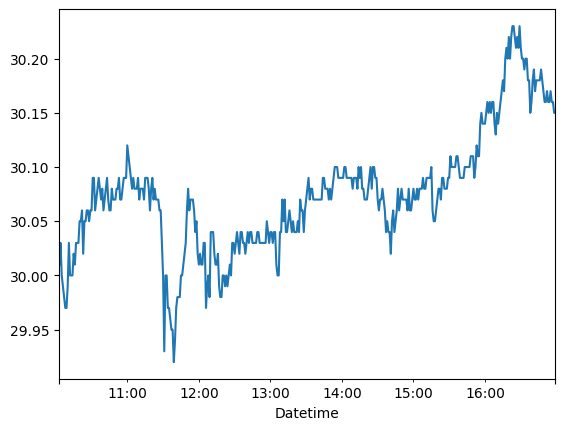

In [17]:
df['Close'].plot()

<Axes: title={'center': 'PETR4.SA: cotações minuto a minuto'}, xlabel='Horário', ylabel='Preço (R$)'>

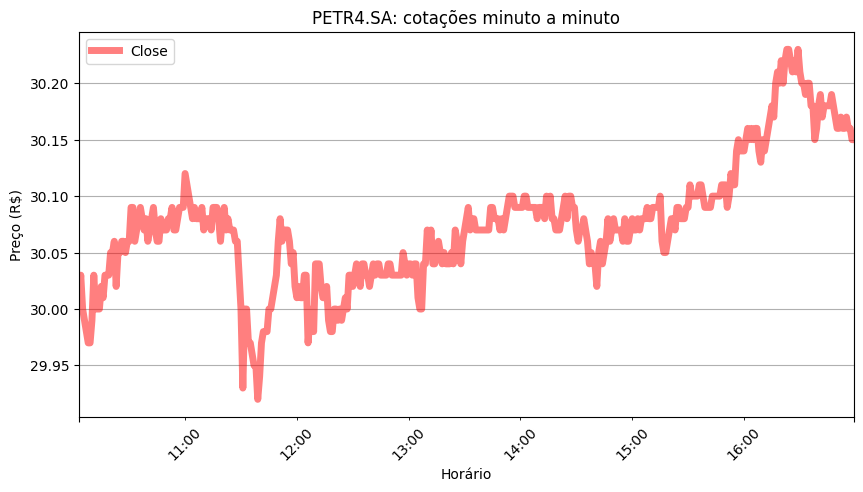

In [23]:
df['Close'].plot(
    title=f'{ticker}: cotações minuto a minuto',
    xlabel='Horário',
    ylabel='Preço (R$)',
    grid=True,
    figsize=(10,5),
    color='red',
    linewidth=5,
    linestyle='-', 
    alpha=0.5,
    rot=45,
    legend=True
)



<Axes: title={'center': 'PETR4.SA: cotações minuto a minuto e média móvel simples'}, xlabel='Horário', ylabel='Preço (R$)'>

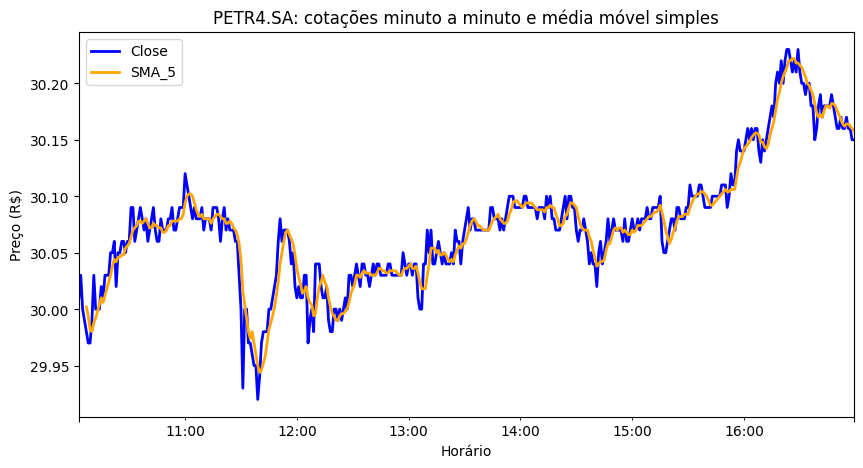

In [24]:
# Média móvel simples(SMA) de 5 em 5 minutos
df['SMA_5'] = df['Close'].rolling(window=5).mean()

df[['Close', 'SMA_5']].plot(
    title=f'{ticker}: cotações minuto a minuto e média móvel simples',
    xlabel='Horário',
    ylabel='Preço (R$)',
    figsize=(10,5),
    color=['blue','orange'],
    linewidth=2,
    legend=True
)

<Axes: title={'center': 'PETR4.SA: volume minuto a minuto'}, xlabel='Horário', ylabel='Volume Negociado'>

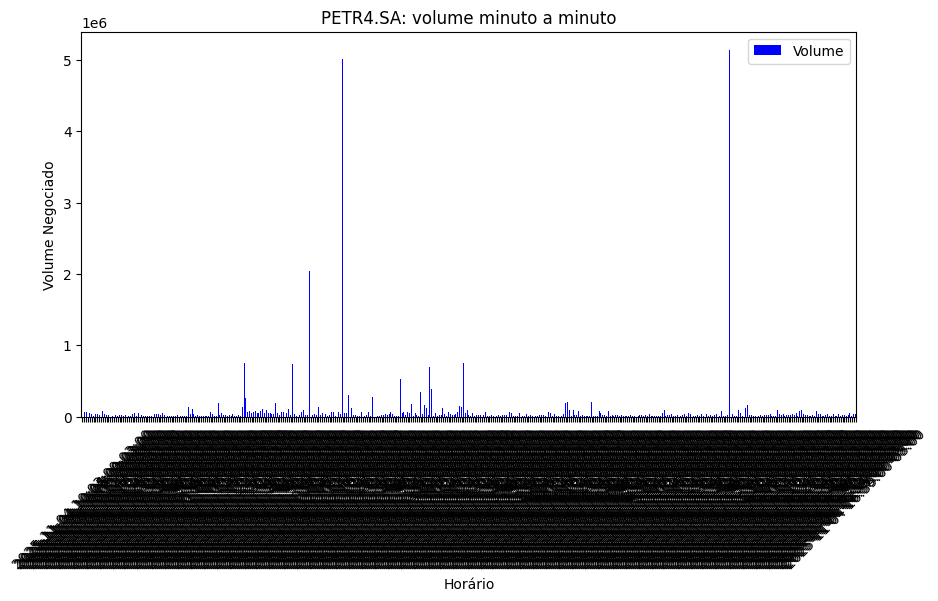

In [26]:
df['Volume'].plot.bar(
    title=f'{ticker}: volume minuto a minuto',
    xlabel='Horário',
    ylabel='Volume Negociado',
    figsize=(10,5),
    color='blue',
    rot=45,
    legend=True
)

<Axes: title={'center': 'PETR4.SA: volume minuto a minuto'}, xlabel='Horário', ylabel='Volume Negociado'>

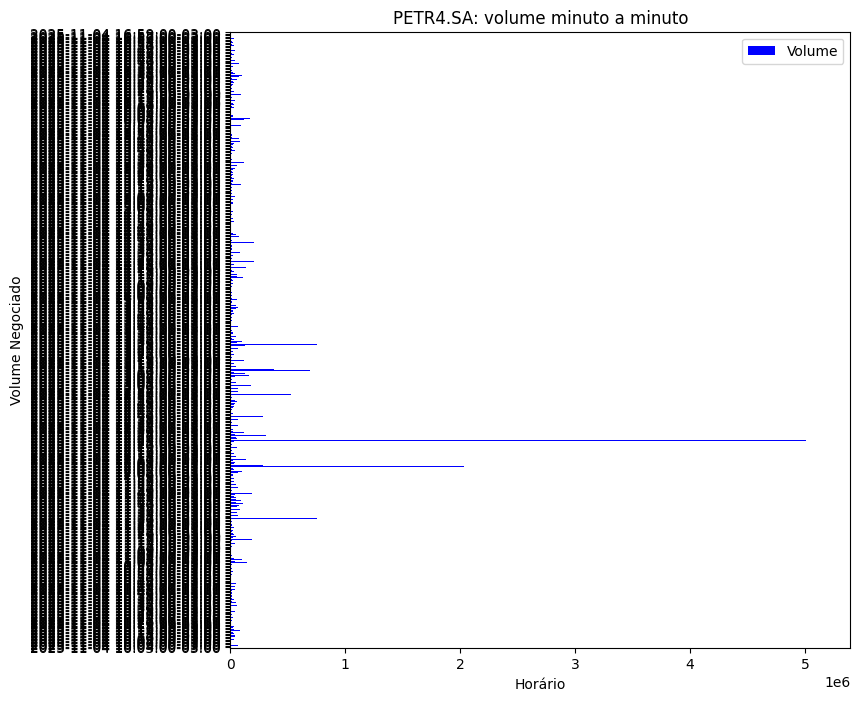

In [27]:
df['Volume'].plot.barh(
    title=f'{ticker}: volume minuto a minuto',
    xlabel='Horário',
    ylabel='Volume Negociado',
    figsize=(8,8),
    color='blue',
    legend=True
)

<Axes: title={'center': 'Dispersão: Close vs Volume'}, xlabel='Close', ylabel='Volume'>

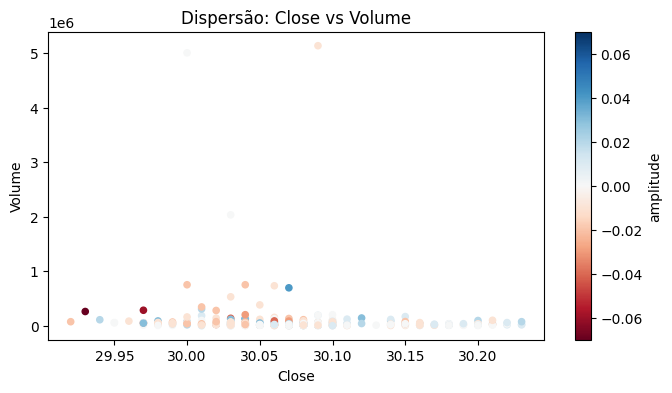

In [31]:
df['amplitude'] = df['Close'] - df['Open']

df.plot.scatter(
    x='Close',
    y='Volume',
    c='amplitude',
    colormap='RdBu',
    title='Dispersão: Close vs Volume',
    figsize=(8,4)
)

array([<Axes: xlabel='Horário', ylabel='Preço (R$)'>,
       <Axes: xlabel='Horário', ylabel='Preço (R$)'>,
       <Axes: xlabel='Horário', ylabel='Preço (R$)'>], dtype=object)

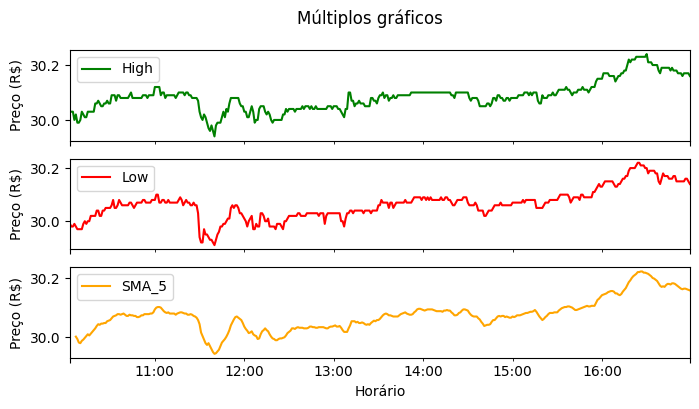

In [32]:
df[['High', 'Low', 'SMA_5']].plot(
    subplots=True,
    title=f'Múltiplos gráficos',
    xlabel='Horário',
    ylabel='Preço (R$)',
    figsize=(8,4),
    color=['green', 'red', 'orange']
)